<a href="https://colab.research.google.com/github/kusum-2003/cotton-plant-disease-classification/blob/main/cotton_plant_disease_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COTTON PLANT DISEASE CLASSIFICATION PROJECT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Importing Required Libraries
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline 

In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_tuner import RandomSearch

In [ ]:
print(tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

2.11.0
Please install GPU version of TF


In [ ]:
 print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
 

Default GPU Device: 


In [ ]:
tf.test.gpu_device_name()

''

**GENERATING DATA**

In [ ]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
train_data = train_datagenerator.flow_from_directory('/content/drive/MyDrive/Cotton Disease(f)/train',
                                                    target_size = (227,227),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 452 images belonging to 4 classes.


In [ ]:
test_data = test_datagenerator.flow_from_directory('/content/drive/MyDrive/Cotton Disease(f)/val',
                                                  target_size = (227,227),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 120 images belonging to 4 classes.


**CNN IMPLEMENTATION**

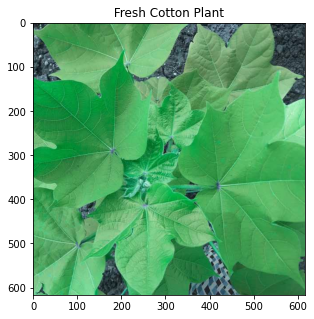

In [ ]:
image = cv2.imread('/content/drive/MyDrive/archive (1)/Cotton Disease/train/fresh cotton plant/dsd (1)_iaip.jpj')
plt.figure(figsize=(5,5)) 
plt.title(' Fresh Cotton Plant ')
plt.imshow(image)

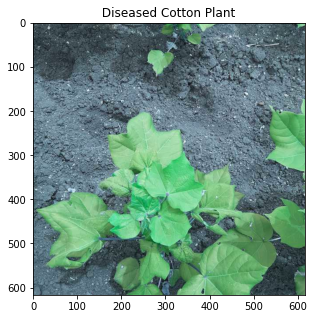

In [ ]:
image = cv2.imread('/content/drive/MyDrive/archive (1)/Cotton Disease/train/diseased cotton plant/dd (101)_iaip.jpg')
plt.figure(figsize=(5,5)) 
plt.title(' Diseased Cotton Plant ')
plt.imshow(image)

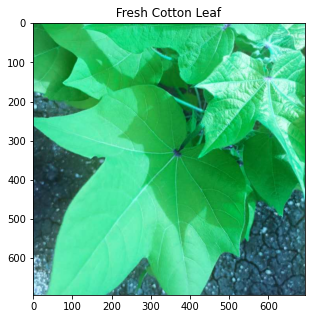

In [ ]:
image = cv2.imread('/content/drive/MyDrive/archive (1)/Cotton Disease/test/fresh cotton leaf/d (282)_iaip.jpg')
plt.figure(figsize=(5,5)) 
plt.title(' Fresh Cotton Leaf ')
plt.imshow(image)

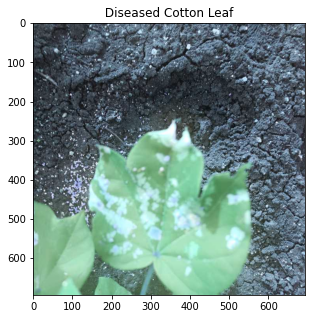

In [ ]:
image = cv2.imread('/content/drive/MyDrive/archive (1)/Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg')
plt.figure(figsize=(5,5)) 
plt.title(' Diseased Cotton Leaf ')
plt.imshow(image)

In [ ]:
cnn = tf.keras.models.Sequential()
# Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[227,227,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 50)

Epoch 1/50
8/8 [==============================] - 222s 31s/step - loss: 1.4228 - accuracy: 0.3009 - val_loss: 1.4397 - val_accuracy: 0.2500
Epoch 2/50
8/8 [==============================] - 174s 21s/step - loss: 1.3762 - accuracy: 0.3031 - val_loss: 1.4214 - val_accuracy: 0.2500
Epoch 3/50
8/8 [==============================] - 174s 21s/step - loss: 1.3798 - accuracy: 0.2965 - val_loss: 1.3823 - val_accuracy: 0.2500
Epoch 4/50
8/8 [==============================] - 183s 23s/step - loss: 1.3734 - accuracy: 0.2942 - val_loss: 1.3832 - val_accuracy: 0.2500
Epoch 5/50
8/8 [==============================] - 174s 21s/step - loss: 1.3680 - accuracy: 0.3296 - val_loss: 1.3312 - val_accuracy: 0.2583
Epoch 6/50
8/8 [==============================] - 173s 24s/step - loss: 1.3261 - accuracy: 0.3695 - val_loss: 1.3150 - val_accuracy: 0.2833
Epoch 7/50
8/8 [==============================] - 179s 22s/step - loss: 1.3144 - accuracy: 0.4027 - val_loss: 1.2238 - val_accuracy: 0.3500
Epoch 8/50
8/8 [====

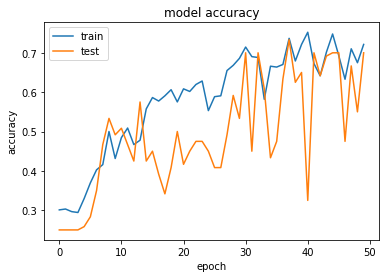

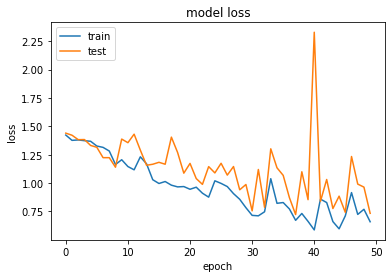

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history

{'loss': [1.4227997064590454,
  1.376215934753418,
  1.3797569274902344,
  1.3734419345855713,
  1.3679616451263428,
  1.3261327743530273,
  1.314392328262329,
  1.2822374105453491,
  1.1636433601379395,
  1.2056286334991455,
  1.145621418952942,
  1.1168562173843384,
  1.2312730550765991,
  1.1695234775543213,
  1.0295783281326294,
  0.9964131116867065,
  1.013710856437683,
  0.9816227555274963,
  0.9665162563323975,
  0.9693464040756226,
  0.9455814361572266,
  0.9637993574142456,
  0.9108555912971497,
  0.8761966824531555,
  1.0200380086898804,
  0.9972538352012634,
  0.9692962169647217,
  0.9073066115379333,
  0.8573406934738159,
  0.7832518815994263,
  0.715758740901947,
  0.7116698026657104,
  0.7474100589752197,
  1.0386213064193726,
  0.8219608664512634,
  0.8286449909210205,
  0.7722346186637878,
  0.6720821261405945,
  0.732365608215332,
  0.6629043221473694,
  0.5876647233963013,
  0.859000563621521,
  0.8285839557647705,
  0.6609539985656738,
  0.5972076058387756,
  0.71165

In [ ]:
history.history['accuracy']

[0.3008849620819092,
 0.30309733748435974,
 0.29646018147468567,
 0.2942477762699127,
 0.3296460211277008,
 0.36946901679039,
 0.40265485644340515,
 0.4159291982650757,
 0.5,
 0.4314159154891968,
 0.4845132827758789,
 0.508849561214447,
 0.46681416034698486,
 0.47787609696388245,
 0.5575221180915833,
 0.5862832069396973,
 0.5774336457252502,
 0.5907079577445984,
 0.6061946749687195,
 0.5752212405204773,
 0.6084070801734924,
 0.6017699241638184,
 0.6194690465927124,
 0.6283186078071594,
 0.5530973672866821,
 0.5884955525398254,
 0.5907079577445984,
 0.6548672318458557,
 0.6681416034698486,
 0.6858407258987427,
 0.7146017551422119,
 0.6902654767036438,
 0.6880530714988708,
 0.5818583965301514,
 0.6659291982650757,
 0.6637167930603027,
 0.6703540086746216,
 0.7367256879806519,
 0.6792035102844238,
 0.721238911151886,
 0.752212405204773,
 0.6725663542747498,
 0.6415929198265076,
 0.7013274431228638,
 0.747787594795227,
 0.6924778819084167,
 0.6327433586120605,
 0.7101770043373108,
 0.67477

In [ ]:
np.mean(history.history['accuracy'])

0.580663715004921

In [ ]:
np.mean(history.history['loss'])

0.9616302812099456

**VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense
from glob import glob

In [ ]:
Image_size = [224,224]

train_path = '/content/drive/MyDrive/Cotton Disease(f)/train'
test_path = '/content/drive/MyDrive/Cotton Disease(f)/test'

In [ ]:
train_datavg = train_datagenerator.flow_from_directory('/content/drive/MyDrive/Cotton Disease(f)/train',
                                                    target_size = (224,224),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 452 images belonging to 4 classes.


In [ ]:
test_datavg = test_datagenerator.flow_from_directory('/content/drive/MyDrive/Cotton Disease(f)/val',
                                                  target_size = (224,224),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 120 images belonging to 4 classes.


In [ ]:
vgg16 = VGG16(input_shape = Image_size + [3], weights = 'imagenet', include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# freez the pretrained structure
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
number_of_classes = glob('/content/drive/MyDrive/Cotton Disease(f)/train/*')
number_of_classes

['/content/drive/MyDrive/Cotton Disease(f)/train/diseased cotton leaf',
 '/content/drive/MyDrive/Cotton Disease(f)/train/diseased cotton plant',
 '/content/drive/MyDrive/Cotton Disease(f)/train/fresh cotton leaf',
 '/content/drive/MyDrive/Cotton Disease(f)/train/fresh cotton plant']

In [ ]:
flatten_layer = Flatten()(vgg16.output)

In [ ]:
output_layer = Dense(len(number_of_classes),activation = 'softmax')(flatten_layer)

In [ ]:
vgg16_model = Model(inputs = vgg16.input,outputs = output_layer)

In [ ]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg16_model.compile(loss= 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [ ]:
history = vgg16_model.fit_generator(train_datavg,validation_data= test_datavg,epochs = 49,
                                   steps_per_epoch=len(train_datavg),validation_steps=len(test_datavg))

<ipython-input-64-3787f00850fd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = vgg16_model.fit_generator(train_datavg,validation_data= test_datavg,epochs = 49,


Epoch 1/49
8/8 [==============================] - 380s 48s/step - loss: 1.7887 - accuracy: 0.3650 - val_loss: 0.9596 - val_accuracy: 0.5833
Epoch 2/49
8/8 [==============================] - 379s 48s/step - loss: 1.1757 - accuracy: 0.4801 - val_loss: 1.0053 - val_accuracy: 0.5333
Epoch 3/49
8/8 [==============================] - 378s 48s/step - loss: 0.9341 - accuracy: 0.5951 - val_loss: 0.5887 - val_accuracy: 0.8000
Epoch 4/49
8/8 [==============================] - 378s 48s/step - loss: 0.8121 - accuracy: 0.6593 - val_loss: 0.5830 - val_accuracy: 0.8167
Epoch 5/49
8/8 [==============================] - 377s 48s/step - loss: 0.7170 - accuracy: 0.6792 - val_loss: 0.6304 - val_accuracy: 0.7167
Epoch 6/49
8/8 [==============================] - 379s 48s/step - loss: 0.7637 - accuracy: 0.6748 - val_loss: 0.3961 - val_accuracy: 0.8500
Epoch 7/49
8/8 [==============================] - 377s 48s/step - loss: 0.6903 - accuracy: 0.6991 - val_loss: 0.3554 - val_accuracy: 0.8667
Epoch 8/49
8/8 [====

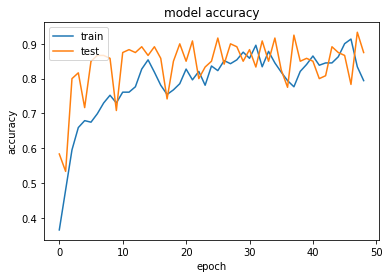

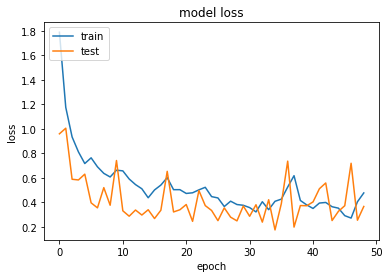

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
history.history['accuracy']

[0.3650442361831665,
 0.4800885021686554,
 0.5951327681541443,
 0.6592920422554016,
 0.6792035102844238,
 0.6747787594795227,
 0.6991150379180908,
 0.730088472366333,
 0.752212405204773,
 0.730088472366333,
 0.76106196641922,
 0.76106196641922,
 0.7765486836433411,
 0.8274336457252502,
 0.8539823293685913,
 0.8185840845108032,
 0.7809734344482422,
 0.7544247508049011,
 0.767699122428894,
 0.7853982448577881,
 0.8274336457252502,
 0.7964601516723633,
 0.8207964897155762,
 0.7809734344482422,
 0.8362832069396973,
 0.8230088353157043,
 0.8517699241638184,
 0.8429203629493713,
 0.8539823293685913,
 0.8761062026023865,
 0.8584070801734924,
 0.8960176706314087,
 0.8340708017349243,
 0.8783186078071594,
 0.8451327681541443,
 0.8185840845108032,
 0.7942478060722351,
 0.7765486836433411,
 0.8207964897155762,
 0.8407079577445984,
 0.8650442361831665,
 0.8384955525398254,
 0.8451327681541443,
 0.8451327681541443,
 0.8628318309783936,
 0.9004424810409546,
 0.9137167930603027,
 0.8340708017349243,


In [ ]:
np.mean(history.history['accuracy'])

0.7882427348166096

In [ ]:
np.mean(hist)